# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

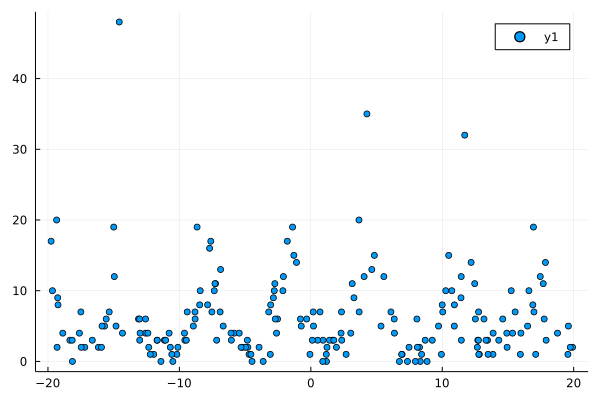

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:03
  iter:  20
  ELBO:  -556.1673914645946
[ Info: Training ended after 20 iterations. Total number of iterations 20
  4.145313 seconds (7.05 M allocations: 455.398 MiB, 10.02% gc time, 97.59% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.20910080173872983, 0.38074663898401634, 0.4810667932536452, 0.36940931869862514, 0.34635736215444746, 0.40511849323729426, 0.32570733302274046, 0.4354486188172853, 0.21541053864371504, 0.3881495029352986  …  0.19788100684493048, 0.39104745634783633, 0.19518820419206506, 0.196562269555576, 0.21066213550512294, 0.5973275698312835, 0.3188070415607271, 0.15919009280197882, 0.6347211605240493, 0.22429498374496395], θ = [4.98186132665567, 9.386873356008786, 2.4528766577435435, 2.4719528359620937, 3.4654253783287072, 6.412536311282742, 5.947514094499989, 3.9379707394378354, 2.9884531513430184, 3.950525241220254  …  5.980497914115598, 3.949794883275641, 3.4889301290061683, 4.485566989682568, 3.9852725098809167, 2.913871702994101, 5.453884599599333, 6.486308058309496, 2.9031809576617595, 3.983314523426644]), opt_state = (NamedTuple(),), hyperopt_state = (

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -710.3621102290462
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.912591 seconds (4.69 M allocations: 334.099 MiB, 4.94% gc time, 93.97% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 13.360510230353448) infered by Analytic Variational Inference , (local_vars = (c = [0.2887966515947536, 0.296950307498978, 0.6603588829818391, 0.5506642467177842, 0.5273288860756808, 0.3521750265626422, 0.24643086574850073, 0.624481291647406, 0.2708038397094237, 0.5581106099010986  …  0.2694405892381132, 0.5629057768173686, 0.25720811265990656, 0.2594393095802685, 0.34830936701979287, 0.7782763723590589, 0.2421406398494267, 0.21364793410965335, 0.814904184670991, 0.3562504038545273], θ = [6.146932226011708, 9.833297351289712, 4.193478202550367, 4.05246686886368, 4.999346167931829, 6.735511318037765, 6.469544251032027, 5.611488050919314, 4.104315347002004, 5.509678772466633  …  7.1144679862115865, 5.493362617709836, 4.609896856740273, 5.6070041673254085, 5.282757017729132, 4.796558672771444, 5.997596882928553, 7.562757005342427, 4.820133670412472, 5.289110980651], γ = [7.379191862303101, 5.810898608208929, 8.689541763140072, 8

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

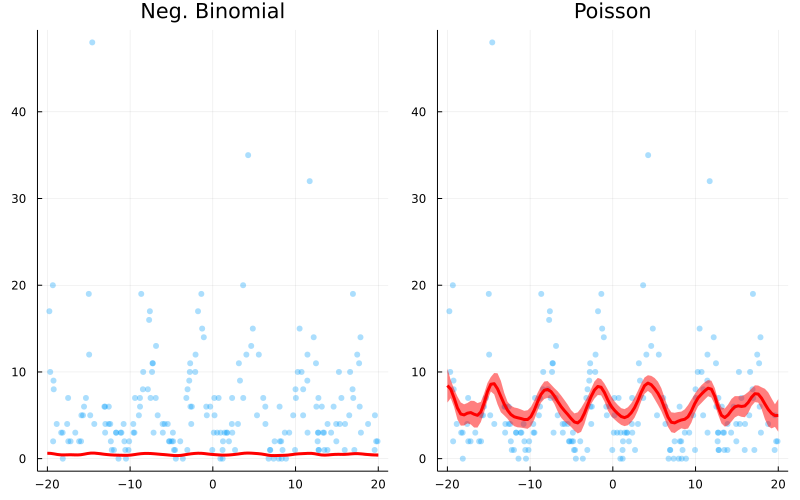

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*